In [1]:
import pickle
import numpy as np

pickle_in = open("X_train.pickle","rb")
X_train = pickle.load(pickle_in)

pickle_in = open("y_train.pickle","rb")
y_train = pickle.load(pickle_in)

X_train = np.array(X_train/255.0)
y_train = np.array(y_train)

pickle_in = open("X_test.pickle","rb") 
X_test = pickle.load(pickle_in)

pickle_in = open("y_test.pickle","rb") 
y_test = pickle.load(pickle_in)

X_test = np.array(X_test/255.0) 
y_test = np.array(y_test)

In [2]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Dense
from keras.models import Model, Sequential

In [3]:
feature_extractor = tf.keras.models.Sequential()

feature_extractor.add( tf.keras.layers.Conv2D(filters=16,padding="same",kernel_size=3, activation='relu', strides=2, input_shape=X_train.shape[1:] ))
feature_extractor.add( tf.keras.layers.MaxPool2D(pool_size=2, strides=2 ))


feature_extractor.add( tf.keras.layers.Conv2D(filters=32,padding='same',kernel_size=3, activation='relu' ))
feature_extractor.add( tf.keras.layers.MaxPool2D(pool_size=2, strides=2 ))

feature_extractor.add( tf.keras.layers.Conv2D(filters=64,padding='same',kernel_size=3, activation='relu' ))
feature_extractor.add( tf.keras.layers.MaxPool2D(pool_size=2, strides=2 ))

feature_extractor.add( tf.keras.layers.Conv2D(filters=128,padding='same',kernel_size=3, activation='relu' ))
feature_extractor.add( tf.keras.layers.MaxPool2D(pool_size=2, strides=2 ))

feature_extractor.add( tf.keras.layers.Flatten())

feature_extractor.add( tf.keras.layers.Dense(units=256, activation='relu' ))
feature_extractor.add( tf.keras.layers.Dense(units=128, activation='relu' ))
feature_extractor.add(tf.keras.layers.Dense(units=1, activation='sigmoid' ))


In [4]:
feature_extractor.compile(optimizer='adam',
                  loss = 'binary_crossentropy', metrics = ['accuracy'])
#print(feature_extractor.summary()) 

In [5]:
#Train the CNN model
history = feature_extractor.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test))

Epoch 1/50
36/36 [==============================] - 15s 411ms/step - loss: 0.5338 - accuracy: 0.7932 - val_loss: 0.3013 - val_accuracy: 0.8803
Epoch 2/50
36/36 [==============================] - 14s 390ms/step - loss: 0.2783 - accuracy: 0.8914 - val_loss: 0.2339 - val_accuracy: 0.9094
Epoch 3/50
36/36 [==============================] - 15s 408ms/step - loss: 0.1892 - accuracy: 0.9305 - val_loss: 0.2992 - val_accuracy: 0.8706
Epoch 4/50
36/36 [==============================] - 15s 426ms/step - loss: 0.1341 - accuracy: 0.9592 - val_loss: 0.2310 - val_accuracy: 0.9094
Epoch 5/50
36/36 [==============================] - 15s 409ms/step - loss: 0.0979 - accuracy: 0.9679 - val_loss: 0.1666 - val_accuracy: 0.9353
Epoch 6/50
36/36 [==============================] - 15s 409ms/step - loss: 0.0495 - accuracy: 0.9878 - val_loss: 0.2502 - val_accuracy: 0.9482
Epoch 7/50
36/36 [==============================] - 15s 410ms/step - loss: 0.0604 - accuracy: 0.9791 - val_loss: 0.2209 - val_accuracy: 0.9256

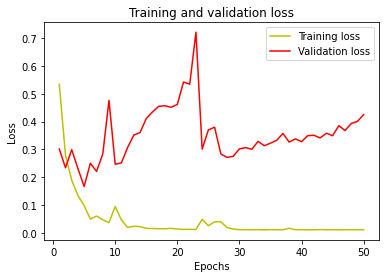

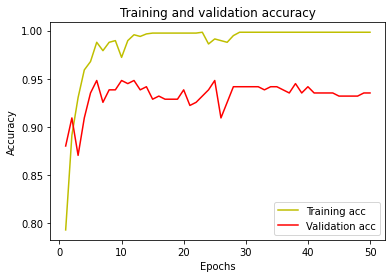

In [6]:

import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [7]:
X_for_RF = feature_extractor.predict(X_train) 

#RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier
RF_model = RandomForestClassifier(n_estimators = 50, random_state = 42)

In [8]:
RF_model.fit(X_for_RF, y_train)

RandomForestClassifier(n_estimators=50, random_state=42)

In [9]:
X_test_feature = feature_extractor.predict(X_test) 
prediction_RF = RF_model.predict(X_test_feature)


In [10]:
from sklearn import metrics
print ("Accuracy = ", metrics.accuracy_score(y_test, prediction_RF))

Accuracy =  0.9352750809061489


The prediction for this image is:  0
The actual label for this image is:  0


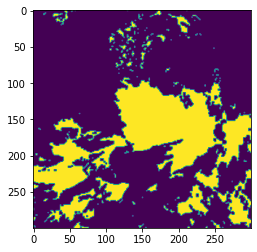

In [11]:
n = 166
img = X_test[n]
plt.imshow(img)
input_img = np.expand_dims(img, axis=0) 
input_img_features=feature_extractor.predict(input_img)
prediction_RF = RF_model.predict(input_img_features)[0] 
print("The prediction for this image is: ", prediction_RF)
print("The actual label for this image is: ", y_test[n])

In [16]:
pickle_in = open("X_data.pickle","rb") 
X_data = pickle.load(pickle_in)

pickle_in = open("y_data.pickle","rb") 
y_data = pickle.load(pickle_in)

X_data = np.array(X_data/255.0) 
y_data = np.array(y_data)

from sklearn.model_selection import cross_val_score

X = feature_extractor.predict(X_data)

forest = RandomForestClassifier(n_estimators = 50, random_state = 42)

accuracies = cross_val_score(forest, X, y_data, cv=10)
accuracies.mean()

0.9678082191780822

In [17]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
confusion_matrix(y_test, RF_model.predict(X_test_feature))

array([[170,  18],
       [  3, 118]], dtype=int64)

In [18]:
print(classification_report(y_test, RF_model.predict(X_test_feature)))

              precision    recall  f1-score   support

           0       0.98      0.90      0.94       188
           1       0.87      0.98      0.92       121

    accuracy                           0.93       309
   macro avg       0.93      0.94      0.93       309
weighted avg       0.94      0.93      0.93       309



In [21]:
forest.fit(X, y_data)
accuracies = cross_val_score(forest, X, y_data, cv=10)

In [23]:
accuracies.mean()

0.9678082191780822